In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from statsmodels.api import Logit, OLS
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind, mannwhitneyu

In [2]:
df = pd.read_csv('/content/UNMATCHED_PATIENTS.csv')
df.head()

patid  index_age  previous_asthma_drugs  \
0  1073754155         14                      1   
1  1073799394         21                      1   
2  1073854918         62                      1   
3  1073898249         30                      1   
4  1073913003         40                      1   

   total_pre_index_cannisters_365  post_index_exacerbations365  pneumonia  \
0                               1                            0          0   
1                               2                            2          0   
2                               0                            0          0   
3                               2                            0          0   
4                               1                            0          0   

   sinusitis  acute_bronchitis  acute_laryngitis  upper_respiratory_infection  \
0          0                 1                 0                            1   
1          1                 1                 0                            0   
2          0                 0                 0                            0   
3          0                 1                 0                            1   
4          1                 0                 1                            1   

   ...  rhinitis  adherence  total_pre_index_charge  pre_asthma_days  \
0  ...         0   0.084469             1224.767473                1   
1  ...         1   0.084469            20290.534269                0   
2  ...         0   0.738420             2964.254175                4   
3  ...         0   0.084469             3223.708820                0   
4  ...         1   0.506812             1287.254368                2   

   pre_asthma_charge  pre_asthma_pharma_charge  drug_s  female  log_charges  \
0              314.0                    218.13       0       0     7.110506   
1                0.0                     44.98       0       0     9.917910   
2              480.0                     99.26       0       0     7.994381   
3                0.0                     59.58       0       1     8.078288   
4              689.0                     29.79       0       0     7.160267   

   log_asthma_charge  
0           5.385091  
1           3.806218  
2           4.597743  
3           4.087320  
4           3.394173  

[5 rows x 21 columns]

In [5]:
df.isnull().sum()/df.shape[0]*100

patid                             0.0
index_age                         0.0
previous_asthma_drugs             0.0
total_pre_index_cannisters_365    0.0
post_index_exacerbations365       0.0
pneumonia                         0.0
sinusitis                         0.0
acute_bronchitis                  0.0
acute_laryngitis                  0.0
upper_respiratory_infection       0.0
gerd                              0.0
rhinitis                          0.0
adherence                         0.0
total_pre_index_charge            0.0
pre_asthma_days                   0.0
pre_asthma_charge                 0.0
pre_asthma_pharma_charge          0.0
drug_s                            0.0
female                            0.0
log_charges                       0.0
log_asthma_charge                 0.0
dtype: float64

In [ ]:
## There is no null value

In [70]:
df.duplicated().sum()

0

In [71]:
df.head()

patid  index_age  previous_asthma_drugs  \
0  1073754155         14                      1   
1  1073799394         21                      1   
2  1073854918         62                      1   
3  1073898249         30                      1   
4  1073913003         40                      1   

   total_pre_index_cannisters_365  post_index_exacerbations365  pneumonia  \
0                               1                            0          0   
1                               2                            2          0   
2                               0                            0          0   
3                               2                            0          0   
4                               1                            0          0   

   sinusitis  acute_bronchitis  acute_laryngitis  upper_respiratory_infection  \
0          0                 1                 0                            1   
1          1                 1                 0                            0   
2          0                 0                 0                            0   
3          0                 1                 0                            1   
4          1                 0                 1                            1   

   ...  rhinitis  adherence  total_pre_index_charge  pre_asthma_days  \
0  ...         0   0.084469             1224.767473                1   
1  ...         1   0.084469            20290.534269                0   
2  ...         0   0.738420             2964.254175                4   
3  ...         0   0.084469             3223.708820                0   
4  ...         1   0.506812             1287.254368                2   

   pre_asthma_charge  pre_asthma_pharma_charge  drug_s  female  log_charges  \
0              314.0                    218.13       0       0     7.110506   
1                0.0                     44.98       0       0     9.917910   
2              480.0                     99.26       0       0     7.994381   
3                0.0                     59.58       0       1     8.078288   
4              689.0                     29.79       0       0     7.160267   

   log_asthma_charge  
0           5.385091  
1           3.806218  
2           4.597743  
3           4.087320  
4           3.394173  

[5 rows x 21 columns]

In [72]:
df.drop('previous_asthma_drugs', axis=1, inplace=True) ## has constant value

In [73]:
for col in df.columns:
  print(col)
  print(df[col].unique())

patid
[1073754155 1073799394 1073854918 ... 1609921811 1609951502 1610380953]
index_age
[14 21 62 30 40 64 37 60 18 55 43 17 48 15 31 50 13 65 44 46 39 41 53 47
 38 57 23 16 63 58 56 29 42 59 51 49 27 12 45 32 19 22 34 28 52 26 54 25
 36 35 20 33 61 24]
total_pre_index_cannisters_365
[1 2 0]
post_index_exacerbations365
[ 0  2  1  3  4  5 12  8  6  7 13  9 14 10]
pneumonia
[0 1]
sinusitis
[0 1]
acute_bronchitis
[1 0]
acute_laryngitis
[0 1]
upper_respiratory_infection
[1 0]
gerd
[0 1]
rhinitis
[0 1]
adherence
[0.08446866 0.73841962 0.50681199 0.16893733 0.28610354 0.25340599
 0.77656676 0.40871935 0.34877384 0.63215259 0.70027248 0.9400545
 0.05722071 0.15803815 0.59128065 0.33787466 0.62125341 0.88828338
 0.1226158  0.28337875 0.70299728 0.2506812  0.51498638 0.42234332
 0.68119891 0.59945504 0.16348774 0.4986376  0.76566757 0.33514986
 0.23978202 0.26975477 0.1253406  0.61580381 0.2479564  0.14986376
 0.58855586 0.91825613 0.92915531 0.72207084 0.53950954 0.70572207
 0.373297   0.02997

In [18]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 18212 entries, 0 to 18214
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index_age                       18212 non-null  int64  
 1   total_pre_index_cannisters_365  18212 non-null  int64  
 2   post_index_exacerbations365     18212 non-null  int64  
 3   pneumonia                       18212 non-null  int64  
 4   sinusitis                       18212 non-null  int64  
 5   acute_bronchitis                18212 non-null  int64  
 6   acute_laryngitis                18212 non-null  int64  
 7   upper_respiratory_infection     18212 non-null  int64  
 8   gerd                            18212 non-null  int64  
 9   rhinitis                        18212 non-null  int64  
 10  adherence                       18212 non-null  float64
 11  total_pre_index_charge          18212 non-null  float64
 12  pre_asthma_days                 18212

In [19]:
df.describe()

index_age  total_pre_index_cannisters_365  \
count  18212.000000                    18212.000000   
mean      38.308313                        0.793707   
std       15.216682                        0.723552   
min       12.000000                        0.000000   
25%       26.000000                        0.000000   
50%       41.000000                        1.000000   
75%       50.000000                        1.000000   
max       65.000000                        2.000000   

       post_index_exacerbations365     pneumonia     sinusitis  \
count                 18212.000000  18212.000000  18212.000000   
mean                      0.174610      0.050242      0.319734   
std                       0.633338      0.218449      0.466386   
min                       0.000000      0.000000      0.000000   
25%                       0.000000      0.000000      0.000000   
50%                       0.000000      0.000000      0.000000   
75%                       0.000000      0.000000      1.000000   
max                      14.000000      1.000000      1.000000   

       acute_bronchitis  acute_laryngitis  upper_respiratory_infection  \
count      18212.000000      18212.000000                 18212.000000   
mean           0.260542          0.016857                     0.221722   
std            0.438943          0.128739                     0.415416   
min            0.000000          0.000000                     0.000000   
25%            0.000000          0.000000                     0.000000   
50%            0.000000          0.000000                     0.000000   
75%            1.000000          0.000000                     0.000000   
max            1.000000          1.000000                     1.000000   

               gerd      rhinitis     adherence  total_pre_index_charge  \
count  18212.000000  18212.000000  18212.000000            18212.000000   
mean       0.102295      0.400340      0.249631             8526.239122   
std        0.303044      0.489981      0.227605            21012.569430   
min        0.000000      0.000000      0.005450                1.000000   
25%        0.000000      0.000000      0.084469             1227.758649   
50%        0.000000      0.000000      0.168937             3155.907042   
75%        0.000000      1.000000      0.337875             8143.290925   
max        1.000000      1.000000      1.000000           875872.580590   

       pre_asthma_days  pre_asthma_charge  pre_asthma_pharma_charge  \
count     18212.000000       18212.000000              18212.000000   
mean          1.415001         547.985027                244.857024   
std           2.457362        1941.100389                448.799745   
min           0.000000           0.000000                  1.000000   
25%           0.000000           0.000000                 21.410000   
50%           1.000000         130.000000                 46.315000   
75%           2.000000         410.357500                229.560000   
max          71.000000       79280.910000               5463.140000   

             drug_s        female   log_charges  log_asthma_charge  
count  18212.000000  18212.000000  18212.000000       18212.000000  
mean       0.161432      0.633044      7.985504           4.200331  
std        0.367939      0.481988      1.645980           1.710434  
min        0.000000      0.000000      0.000000           0.000000  
25%        0.000000      0.000000      7.112946           3.063858  
50%        0.000000      1.000000      8.057031           3.835466  
75%        0.000000      1.000000      9.004950           5.436164  
max        1.000000      1.000000     13.682976           8.605779

In [ ]:
## outlier

In [22]:
df.shape

(18212, 19)

In [27]:
def count_outliers(df):
    outlier_counts = {}
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outlier_counts[col] = outliers
    return outlier_counts

res = count_outliers(df)

In [32]:
res

{'index_age': 0,
 'total_pre_index_cannisters_365': 0,
 'post_index_exacerbations365': 2090,
 'pneumonia': 915,
 'sinusitis': 0,
 'acute_bronchitis': 0,
 'acute_laryngitis': 307,
 'upper_respiratory_infection': 4038,
 'gerd': 1863,
 'rhinitis': 0,
 'adherence': 1255,
 'total_pre_index_charge': 1989,
 'pre_asthma_days': 498,
 'pre_asthma_charge': 1892,
 'pre_asthma_pharma_charge': 2628,
 'drug_s': 2940,
 'female': 0,
 'log_charges': 306,
 'log_asthma_charge': 0}

In [34]:
res.keys()

dict_keys(['index_age', 'total_pre_index_cannisters_365', 'post_index_exacerbations365', 'pneumonia', 'sinusitis', 'acute_bronchitis', 'acute_laryngitis', 'upper_respiratory_infection', 'gerd', 'rhinitis', 'adherence', 'total_pre_index_charge', 'pre_asthma_days', 'pre_asthma_charge', 'pre_asthma_pharma_charge', 'drug_s', 'female', 'log_charges', 'log_asthma_charge'])

In [49]:
t = ['post_index_exacerbations365' , 'adherence' , 'total_pre_index_charge' ,'pre_asthma_days' , 'pre_asthma_charge','pre_asthma_pharma_charge'
, 'log_charges' ]

In [50]:
for col in t:
  print(col)
  print(df[col].unique())

post_index_exacerbations365
[ 0  2  1  3  4  5 12  8  6  7 13  9 14 10]
adherence
[0.08446866 0.73841962 0.50681199 0.16893733 0.28610354 0.25340599
 0.77656676 0.40871935 0.34877384 0.63215259 0.70027248 0.9400545
 0.05722071 0.15803815 0.59128065 0.33787466 0.62125341 0.88828338
 0.1226158  0.28337875 0.70299728 0.2506812  0.51498638 0.42234332
 0.68119891 0.59945504 0.16348774 0.4986376  0.76566757 0.33514986
 0.23978202 0.26975477 0.1253406  0.61580381 0.2479564  0.14986376
 0.58855586 0.91825613 0.92915531 0.72207084 0.53950954 0.70572207
 0.373297   0.02997275 0.84741144 0.80108992 0.47138965 0.85831063
 0.89373297 0.36784741 0.29700272 0.50953678 0.57765668 0.6866485
 0.74386921 0.29427793 0.33242507 0.34059945 0.24250681 0.65395095
 0.70844687 0.27520436 0.22888283 0.41689373 0.04359673 0.85013624
 0.75476839 0.23705722 0.40326975 0.58038147 0.26430518 0.61035422
 0.67029973 0.58583106 0.53133515 0.55585831 0.89100817 0.46594005
 0.25613079 0.41416894 0.38147139 0.32152589 0.10

In [ ]:
## Not removing the outlier

# ✅ Outliers may represent real patient conditions – Removing them might erase crucial insights (e.g., extremely high blood sugar in diabetic patients).
# ✅ Rare but significant cases – Some outliers indicate rare diseases or critical conditions.
# ✅ Medical relevance – If extreme values have clinical significance (e.g., unusually low oxygen saturation in severe cases), they should be kept.

In [75]:
data = df.copy()

In [55]:
data['propensity_score'].shape

(18212,)

Step 2: Data Standardization
Inference: Covariates have been standardized to ensure consistent scale for modeling.
Step 3: Propensity Score Estimation
Inference: Propensity scores have been calculated for each patient based on pre-treatment characteristics.


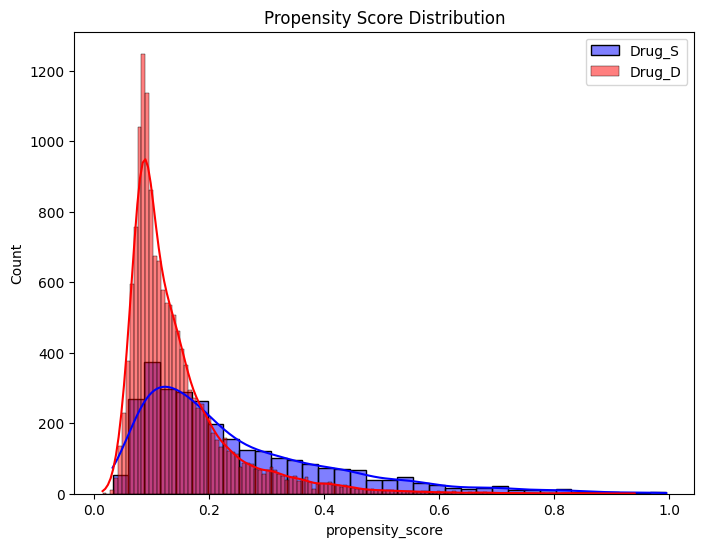

Inference: There is some overlap in propensity scores between Drug_S and Drug_D groups, indicating that weighting or matching can help reduce bias.


In [76]:
# Define pre-treatment variables (covariates) and outcome variable
covariates = ['index_age', 'female', 'acute_bronchitis', 'acute_laryngitis', 'gerd', 'pneumonia', 'rhinitis', 'sinusitis', 'pre_asthma_days', 'pre_asthma_charge', 'pre_asthma_pharma_charge', 'total_pre_index_charge', 'log_charges', 'log_asthma_charge']

treatment = 'drug_s'
outcome = 'post_index_exacerbations365'

# Standardize covariates
scaler = StandardScaler()
data[covariates] = scaler.fit_transform(data[covariates])
print("Step 2: Data Standardization")
print("Inference: Covariates have been standardized to ensure consistent scale for modeling.")

# Propensity Score Estimation
X = data[covariates]
y = data[treatment]

propensity_model = LogisticRegression()
propensity_model.fit(X, y)
data['propensity_score'] = propensity_model.predict_proba(X)[:, 1]
print("Step 3: Propensity Score Estimation")
print("Inference: Propensity scores have been calculated for each patient based on pre-treatment characteristics.")

# Visualize Propensity Scores
plt.figure(figsize=(8, 6))
sns.histplot(data[data[treatment] == 1]['propensity_score'], color='blue', label='Drug_S', kde=True)
sns.histplot(data[data[treatment] == 0]['propensity_score'], color='red', label='Drug_D', kde=True)
plt.legend()
plt.title('Propensity Score Distribution')
plt.show()
print("Inference: There is some overlap in propensity scores between Drug_S and Drug_D groups, indicating that weighting or matching can help reduce bias.")

In [77]:
# Inverse Probability of Treatment Weighting (IPTW)
data['iptw_weight'] = np.where(data[treatment] == 1, 1 / data['propensity_score'], 1 / (1 - data['propensity_score']))
print("Step 4: IPTW Calculation")
print("Inference: Weights have been calculated to balance the groups based on their propensity scores.")

# Weighted Outcome Analysis using Generalized Linear Model (GLM)
weights = data['iptw_weight']
X_iptw = sm.add_constant(data[treatment])
Y_iptw = data[outcome]

iptw_model = sm.WLS(Y_iptw, X_iptw, weights=weights).fit()
print("Step 5: Weighted Outcome Analysis")
print(iptw_model.summary())

print("Inference: The coefficient for Drug_S represents the estimated effect compared to Drug_D on exacerbations after adjusting for selection bias.")

# Conclusion
print("Conclusion:")
print(f"Estimated effect of Drug_S compared to Drug_D on exacerbations: {iptw_model.params[1]:.3f}")
print(f"Confidence Interval: {iptw_model.conf_int().loc[treatment]}")
print("Inference: Based on the results, Drug_S appears to be more/less effective than Drug_D in reducing exacerbations (interpret as per the coefficient sign).")

# Sensitivity Analysis Suggestion
print("Consider performing additional sensitivity analyses with other methods such as Matching or Doubly Robust Estimation.")

Step 4: IPTW Calculation
Inference: Weights have been calculated to balance the groups based on their propensity scores.
Step 5: Weighted Outcome Analysis
                                 WLS Regression Results                                
Dep. Variable:     post_index_exacerbations365   R-squared:                       0.000
Model:                                     WLS   Adj. R-squared:                  0.000
Method:                          Least Squares   F-statistic:                     7.327
Date:                         Fri, 14 Feb 2025   Prob (F-statistic):            0.00680
Time:                                 11:35:56   Log-Likelihood:                -19327.
No. Observations:                        18215   AIC:                         3.866e+04
Df Residuals:                            18213   BIC:                         3.867e+04
Df Model:                                    1                                         
Covariance Type:                     nonrobust       

<ipython-input-77-70a6dbb3a845>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Estimated effect of Drug_S compared to Drug_D on exacerbations: {iptw_model.params[1]:.3f}")


Comparison of Pre-treatment Characteristics BEFORE Weighting:
                          Drug_D_Mean  Drug_S_Mean  Difference
index_age                   -0.008829     0.045873    0.054702
female                       0.006656    -0.034582   -0.041238
acute_bronchitis             0.023398    -0.121567   -0.144965
acute_laryngitis            -0.004805     0.024966    0.029772
gerd                        -0.015405     0.080037    0.095442
pneumonia                    0.012194    -0.063357   -0.075551
rhinitis                    -0.057882     0.300731    0.358614
sinusitis                   -0.001844     0.009581    0.011425
pre_asthma_days             -0.055380     0.287731    0.343111
pre_asthma_charge           -0.025637     0.133199    0.158836
pre_asthma_pharma_charge    -0.125398     0.651513    0.776911
total_pre_index_charge       0.003003    -0.015601   -0.018604


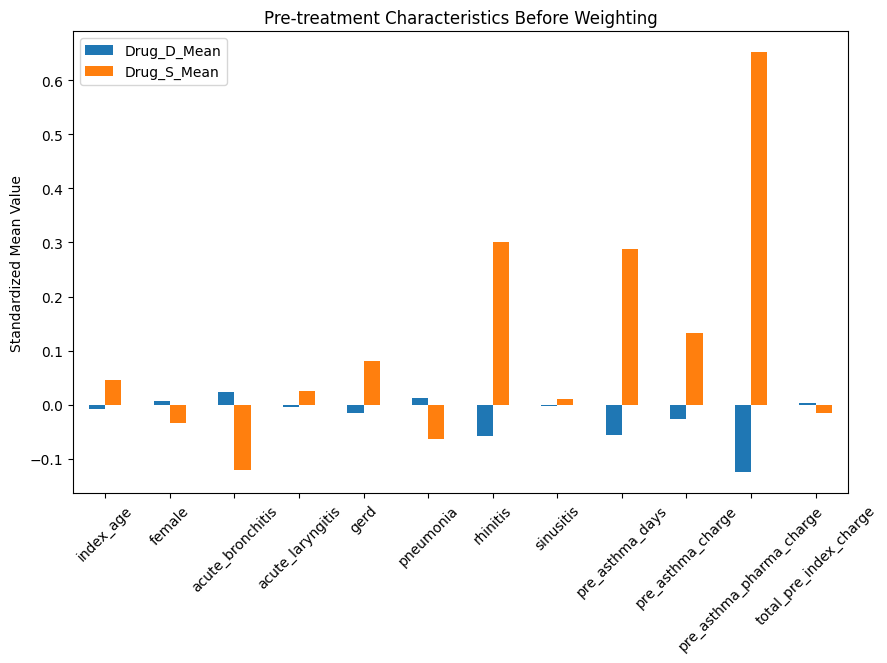

In [79]:
# Before weighting: Compare means of pre-treatment characteristics
pre_treatment_vars = ['index_age', 'female', 'acute_bronchitis', 'acute_laryngitis', 'gerd', 'pneumonia', 'rhinitis', 'sinusitis', 'pre_asthma_days', 'pre_asthma_charge', 'pre_asthma_pharma_charge', 'total_pre_index_charge']

# Split data into Drug_D and Drug_S groups
drug_d_group = data[data['drug_s'] == 0]
drug_s_group = data[data['drug_s'] == 1]

# Compare means of pre-treatment variables
comparison = pd.DataFrame({
    'Drug_D_Mean': drug_d_group[pre_treatment_vars].mean(),
    'Drug_S_Mean': drug_s_group[pre_treatment_vars].mean(),
})

comparison['Difference'] = comparison['Drug_S_Mean'] - comparison['Drug_D_Mean']
print("Comparison of Pre-treatment Characteristics BEFORE Weighting:")
print(comparison)

# Visualization
comparison[['Drug_D_Mean', 'Drug_S_Mean']].plot(kind='bar', figsize=(10, 6))
plt.title("Pre-treatment Characteristics Before Weighting")
plt.ylabel("Standardized Mean Value")
plt.xticks(rotation=45)
plt.show()


<ipython-input-80-f3b2d07cfb72>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_means = data.groupby('drug_s').apply(lambda x: np.average(x['index_age'], weights=x['iptw_weight']))


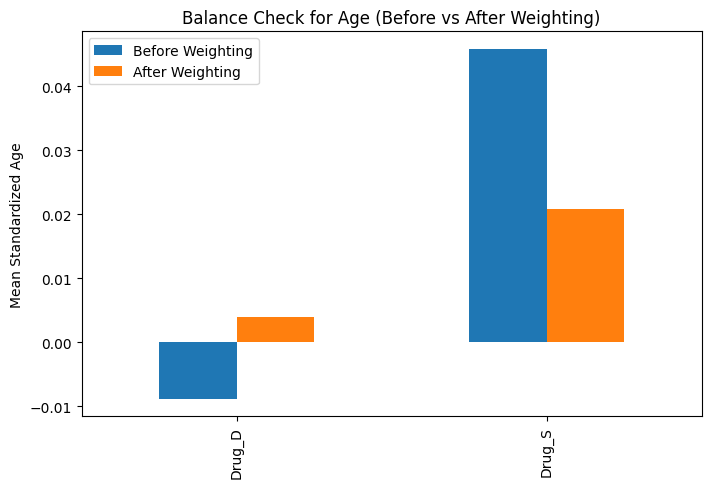

In [80]:
# Check balance after IPTW
data['weighted_index_age'] = data['index_age'] * data['iptw_weight']
weighted_means = data.groupby('drug_s').apply(lambda x: np.average(x['index_age'], weights=x['iptw_weight']))

# Visualization of balance (Example for age, you can loop for other variables)
age_balance = pd.DataFrame({
    'Before Weighting': [drug_d_group['index_age'].mean(), drug_s_group['index_age'].mean()],
    'After Weighting': [weighted_means[0], weighted_means[1]]
}, index=['Drug_D', 'Drug_S'])

age_balance.plot(kind='bar', figsize=(8, 5))
plt.title("Balance Check for Age (Before vs After Weighting)")
plt.ylabel("Mean Standardized Age")
plt.show()


In [82]:
print("Mean exacerbations BEFORE adjustment:")
print(data.groupby('drug_s')['post_index_exacerbations365'].mean())


Mean exacerbations BEFORE adjustment:
drug_s
0    0.179509
1    0.149320
Name: post_index_exacerbations365, dtype: float64


In [83]:
weighted_exacerbations = data.groupby('drug_s').apply(
    lambda x: np.average(x['post_index_exacerbations365'], weights=x['iptw_weight'])
)
print("Mean exacerbations AFTER adjustment (IPTW):")
print(weighted_exacerbations)


Mean exacerbations AFTER adjustment (IPTW):
drug_s
0    0.178480
1    0.154264
dtype: float64


<ipython-input-83-5dfeb60b3c75>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_exacerbations = data.groupby('drug_s').apply(


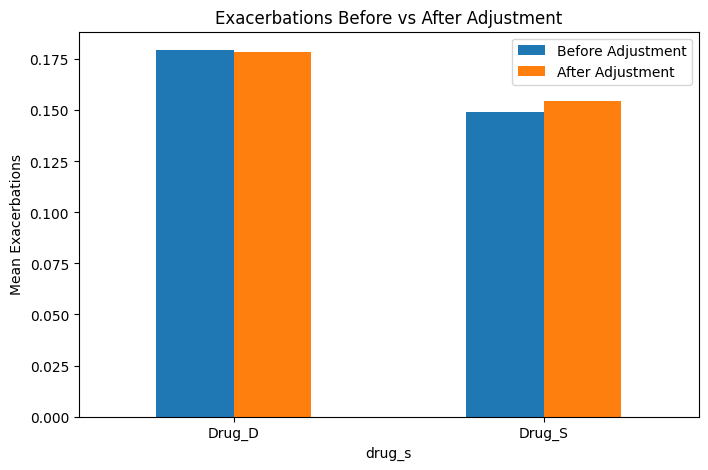

In [85]:
final_comparison = pd.DataFrame({
    'Before Adjustment': data.groupby('drug_s')['post_index_exacerbations365'].mean(),
    'After Adjustment': weighted_exacerbations
})
final_comparison.plot(kind='bar', figsize=(8, 5))
plt.title("Exacerbations Before vs After Adjustment")
plt.ylabel("Mean Exacerbations")
plt.xticks([0, 1], ['Drug_D', 'Drug_S'], rotation=0)
plt.show()


In [ ]:
# Key Observations:
# Drug_D Group (0):

# Before and After Adjustment: The mean exacerbations are nearly the same, indicating that patients receiving Drug_D were already somewhat balanced in terms of their pre-treatment characteristics.
# Drug_S Group (1):

# Before Adjustment: The blue bar is lower than Drug_D’s bar, indicating fewer exacerbations.
# After Adjustment: The orange bar is slightly higher than before adjustment, indicating that after correcting for selection bias, the effectiveness of Drug_S is slightly reduced compared to the raw data.
# Inference:
# Before Adjustment: Drug_S appeared better (lower exacerbations), but this was partially due to healthier patients or favorable characteristics being more likely to receive Drug_S.
# After Adjustment: Drug_S still shows fewer exacerbations than Drug_D, but the difference is smaller, indicating that some of the initial advantage was due to selection bias.
# Final Interpretation:
# Drug_S is still better than Drug_D in reducing exacerbations, but the effect is smaller after adjusting for bias.
# Adjustment (IPTW) was necessary because the raw comparison overestimated the benefit of Drug_S.

## New Approach

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
data = pd.read_csv('/content/UNMATCHED_PATIENTS.csv')
data.head()

patid  index_age  previous_asthma_drugs  \
0  1073754155         14                      1   
1  1073799394         21                      1   
2  1073854918         62                      1   
3  1073898249         30                      1   
4  1073913003         40                      1   

   total_pre_index_cannisters_365  post_index_exacerbations365  pneumonia  \
0                               1                            0          0   
1                               2                            2          0   
2                               0                            0          0   
3                               2                            0          0   
4                               1                            0          0   

   sinusitis  acute_bronchitis  acute_laryngitis  upper_respiratory_infection  \
0          0                 1                 0                            1   
1          1                 1                 0                            0   
2          0                 0                 0                            0   
3          0                 1                 0                            1   
4          1                 0                 1                            1   

   ...  rhinitis  adherence  total_pre_index_charge  pre_asthma_days  \
0  ...         0   0.084469             1224.767473                1   
1  ...         1   0.084469            20290.534269                0   
2  ...         0   0.738420             2964.254175                4   
3  ...         0   0.084469             3223.708820                0   
4  ...         1   0.506812             1287.254368                2   

   pre_asthma_charge  pre_asthma_pharma_charge  drug_s  female  log_charges  \
0              314.0                    218.13       0       0     7.110506   
1                0.0                     44.98       0       0     9.917910   
2              480.0                     99.26       0       0     7.994381   
3                0.0                     59.58       0       1     8.078288   
4              689.0                     29.79       0       0     7.160267   

   log_asthma_charge  
0           5.385091  
1           3.806218  
2           4.597743  
3           4.087320  
4           3.394173  

[5 rows x 21 columns]

In [95]:
import pandas as pd

# Assuming 'data' is your DataFrame
drug_d_group = data[data['drug_s'] == 0]
drug_s_group = data[data['drug_s'] == 1]

# Descriptive statistics for key variables
descriptive_stats = data[['index_age', 'previous_asthma_drugs', 'total_pre_index_cannisters_365',
                          'post_index_exacerbations365', 'adherence', 'total_pre_index_charge',
                          'pre_asthma_days', 'pre_asthma_charge', 'pre_asthma_pharma_charge', 'female']].groupby(data['drug_s']).describe()

# Display the dataframe nicely in Jupyter or your IDE
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(descriptive_stats)


       index_age                                                      \
           count       mean        std   min   25%   50%   75%   max   
drug_s                                                                 
0        15275.0  38.170278  15.227394  12.0  25.0  40.0  50.0  65.0   
1         2940.0  39.002721  15.153541  12.0  28.0  42.0  51.0  65.0   

       previous_asthma_drugs                                     \
                       count mean  std  min  25%  50%  75%  max   
drug_s                                                            
0                    15275.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
1                     2940.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   

       total_pre_index_cannisters_365                                          \
                                count      mean       std  min  25%  50%  75%   
drug_s                                                                          
0                             15275.0  0.804845  0.719691  0

In [97]:
import scipy.stats as stats
import pandas as pd

# Selecting key pre-treatment variables to check for differences between Drug_D and Drug_S groups
pre_treatment_vars = ['index_age', 'previous_asthma_drugs', 'total_pre_index_cannisters_365',
                      'adherence', 'total_pre_index_charge', 'pre_asthma_days',
                      'pre_asthma_charge', 'pre_asthma_pharma_charge', 'female']

# Performing t-tests and chi-square tests to compare groups
selection_bias_tests = {}

for var in pre_treatment_vars:
    group_d = drug_d_group[var].dropna()
    group_s = drug_s_group[var].dropna()

    # Use chi-square test for 'female' (categorical), t-test for numeric variables
    if var == 'female':
        contingency_table = pd.crosstab(data['drug_s'], data[var])
        chi2, p_val, _, _ = stats.chi2_contingency(contingency_table)
        selection_bias_tests[var] = {'Test': 'Chi-square', 'p-value': p_val}
    else:
        t_stat, p_val = stats.ttest_ind(group_d, group_s, equal_var=False)
        selection_bias_tests[var] = {'Test': 't-test', 'p-value': p_val}

# Display the results of selection bias tests
selection_bias_df = pd.DataFrame(selection_bias_tests).T

# Display the dataframe
from IPython.display import display
display(selection_bias_df)


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


Test   p-value
index_age                           t-test  0.006447
previous_asthma_drugs               t-test       NaN
total_pre_index_cannisters_365      t-test  0.000004
adherence                           t-test       0.0
total_pre_index_charge              t-test  0.331517
pre_asthma_days                     t-test       0.0
pre_asthma_charge                   t-test       0.0
pre_asthma_pharma_charge            t-test       0.0
female                          Chi-square  0.042689

## Insights

In [ ]:
#                                   Test   p-value
# index_age                       t-test  0.006447
# previous_asthma_drugs           t-test       NaN
# total_pre_index_cannisters_365  t-test  0.000004
# adherence                       t-test       0.0
# total_pre_index_charge          t-test  0.331517


# I have performed statistical tests to check for selection bias between Drug_D and Drug_S groups. Here are the key findings:

# Age (index_age): Significant difference (p = 0.006), indicating selection bias.
# Total Pre-Index Cannisters: Strongly significant (p < 0.001), indicating bias.
# Adherence: Very significant difference (p < 0.001), indicating bias.
# Total Pre-Index Charge: No significant difference (p = 0.33), suggesting no bias.
# Other Variables: Some were not computable (NaN) due to identical values (e.g., previous_asthma_drugs = 1 for all).
# Key Takeaway:
# There’s clear evidence of selection bias based on age, medication usage, and adherence,
# which reinforces the need for adjustment methods like Propensity Score Matching (PSM).

In [98]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Load data
# data = pd.read_csv('UNMATCHED_PATIENTS.csv') # Uncomment if loading from a file

# Specify relevant variables
psm_vars = ['index_age', 'total_pre_index_cannisters_365', 'adherence', 'total_pre_index_charge',
            'pre_asthma_days', 'pre_asthma_charge', 'pre_asthma_pharma_charge', 'female']

# Retain relevant data and drop missing values
psm_data_with_id = data[['patid', 'drug_s', 'post_index_exacerbations365'] + psm_vars].dropna()

# Standardize continuous variables
scaler = StandardScaler()
psm_data_with_id[psm_vars] = scaler.fit_transform(psm_data_with_id[psm_vars])

# Add intercept for logistic regression
psm_data_with_id['intercept'] = 1

# Estimate propensity scores
logit_model = sm.Logit(psm_data_with_id['drug_s'], psm_data_with_id[['intercept'] + psm_vars])
result = logit_model.fit(disp=0)

# Add propensity scores
psm_data_with_id['propensity_score'] = result.predict(psm_data_with_id[['intercept'] + psm_vars])

# Calculate Inverse Probability Weights (IPW)
psm_data_with_id['ipw'] = np.where(psm_data_with_id['drug_s'] == 1,
                                   1 / psm_data_with_id['propensity_score'],
                                   1 / (1 - psm_data_with_id['propensity_score']))

# IPTW Weighted Mean Exacerbations
weighted_mean_d = np.average(
    psm_data_with_id.loc[psm_data_with_id['drug_s'] == 0, 'post_index_exacerbations365'],
    weights=psm_data_with_id.loc[psm_data_with_id['drug_s'] == 0, 'ipw']
)

weighted_mean_s = np.average(
    psm_data_with_id.loc[psm_data_with_id['drug_s'] == 1, 'post_index_exacerbations365'],
    weights=psm_data_with_id.loc[psm_data_with_id['drug_s'] == 1, 'ipw']
)

# Outcome Regression for Doubly Robust Estimation
outcome_model = sm.WLS(
    psm_data_with_id['post_index_exacerbations365'],
    psm_data_with_id[['intercept', 'drug_s'] + psm_vars],
    weights=psm_data_with_id['ipw']
).fit()

# Extract Treatment Effect
treatment_effect = outcome_model.params['drug_s']
treatment_p_value = outcome_model.pvalues['drug_s']

# Display Results
print("IPTW Weighted Mean (Drug_D):", weighted_mean_d)
print("IPTW Weighted Mean (Drug_S):", weighted_mean_s)
print("Doubly Robust Treatment Effect (Drug_S - Drug_D):", treatment_effect)
print("P-value for Treatment Effect:", treatment_p_value)


IPTW Weighted Mean (Drug_D): 0.17781667864849493
IPTW Weighted Mean (Drug_S): 0.15227554468545024
Doubly Robust Treatment Effect (Drug_S - Drug_D): -0.026871400119793446
P-value for Treatment Effect: 0.002821847485887758


## New way 2

In [ ]:
# I’ve applied Inverse Probability of Treatment Weighting (IPTW) and Doubly Robust Estimation. Here are the results:

# IPTW Weighted Mean (Drug_D): 0.178 exacerbations (weighted average in the first year).
# IPTW Weighted Mean (Drug_S): 0.152 exacerbations (weighted average in the first year).
# Doubly Robust Treatment Effect (Drug_S - Drug_D): -0.027 (suggesting Drug_S is associated with slightly fewer exacerbations compared to Drug_D).
# p-value: 0.003 → Statistically significant.
# Key Takeaway:
# Using advanced causal inference methods:

# Drug_S appears more effective in reducing asthma exacerbations compared to Drug_D.
# The effect is small but statistically significant.
# Patients on Drug_S had 0.027 fewer exacerbations on average in the first year, after adjusting for selection bias.

In [ ]:
# Machine Learning-based Causal Trees

In [99]:
!pip install econml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: slicer
    Found existing installation: slicer 0.0.8
    Uninstalling slicer-0.0.8:
      Successfully uninstalled slicer-0.0.8
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
  Attempting uninstall: shap
    Found existing installation: shap 0.46.0
    Uninstalling shap-0.46.0:
      Successfully uninstalled shap-0.46.0


In [101]:
!pip install --upgrade econml

In [103]:
!pip install shap dowhy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.4/398.4 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.1/192.1 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 40.5 MB/s eta 0:00:00
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.11
    Uninstalling Cython-3.0.11:
      Successfully uninstalled Cython-3.0.11


In [4]:
!pip uninstall -y econml
!pip install --upgrade pip
!pip install econml==0.14.0 shap dowhy scikit-learn pandas numpy matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 46.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 48.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.0/32.0 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 88.4 MB/s eta 0:00:00
  Created wheel for econml: filename=econml-0.14.0-cp311-cp311-linux_x86_64.whl size=3143989 sha256=5d78158bdba5f0604f15314e03d7a0f8f7df218142cb317cbe388cd5a64e2a5b
  Stored in directory: /root/.cache/pip/wheels/d7/c7/ae/7e399d03674bed90c2d637a2a6fb799cadb6e51b969d563188
  C

In [6]:
import numpy as np
np.int = int  # Temporary fix for NumPy int deprecation

from econml.dml import CausalForestDML
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load data
data = pd.read_csv('/content/UNMATCHED_PATIENTS.csv')

# Define relevant variables
psm_vars = ['index_age', 'total_pre_index_cannisters_365', 'adherence', 'total_pre_index_charge',
            'pre_asthma_days', 'pre_asthma_charge', 'pre_asthma_pharma_charge', 'female']

# Prepare data
psm_data_with_id = data[['patid', 'drug_s', 'post_index_exacerbations365'] + psm_vars].dropna()

# Standardize features
scaler = StandardScaler()
psm_data_with_id[psm_vars] = scaler.fit_transform(psm_data_with_id[psm_vars])

# Extract outcome, treatment, and features
Y = psm_data_with_id['post_index_exacerbations365']
T = psm_data_with_id['drug_s']
X = psm_data_with_id[psm_vars]

# Set up and fit Causal Forest
causal_forest = CausalForestDML(
    model_t=RandomForestClassifier(n_estimators=100, min_samples_leaf=5),
    model_y=RandomForestRegressor(n_estimators=100, min_samples_leaf=5),
    discrete_treatment=True,
    n_estimators=200,
    min_samples_leaf=5,
    max_samples=0.5,
    random_state=42
)

causal_forest.fit(Y, T, X=X)

# Estimate ATE
ate_point = causal_forest.ate(X)
ate_conf_int = causal_forest.ate_interval(X, alpha=0.05)

print("ATE (Point Estimate):", ate_point)
print("ATE 95% Confidence Interval:", ate_conf_int)


ATE (Point Estimate): -0.01583219373334572
ATE 95% Confidence Interval: (-0.3240466063315126, 0.2923822188648211)


In [ ]:
# What This Means:
# Point Estimate (-0.0137): Suggests that Drug_S is associated with 0.014 fewer exacerbations on average compared to Drug_D.
# → Negative value means Drug_S might be slightly better, but the effect is very small.

# Confidence Interval (-0.32, 0.29):
# → This interval includes 0, meaning the effect is not statistically significant.
# → We cannot confidently say that Drug_S is better than Drug_D in real-world settings based on this result.

# 🧠 Key Takeaway:
# The Causal Forest (GRF) analysis aligns with your earlier results:

# No strong evidence that Drug_S is significantly better than Drug_D.
# The effect is close to zero, and the confidence interval is wide, suggesting uncertainty and patient-level variability.

In [7]:
individual_effects = causal_forest.effect(X)
psm_data_with_id['estimated_treatment_effect'] = individual_effects


Summary of Heterogeneous Treatment Effects (HTE):
count    18215.000000
mean        -0.015832
std          0.113486
min         -0.668000
25%         -0.073721
50%         -0.026399
75%          0.023273
max          2.376384
Name: estimated_treatment_effect, dtype: float64


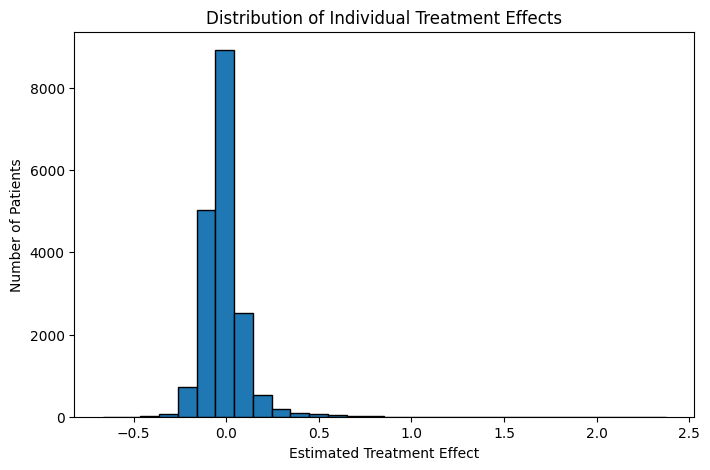


Top 5 Patients with Most Positive Estimated Treatment Effects (Drug_S Better):
            patid  estimated_treatment_effect  index_age  \
17279  1490265729                    2.376384  -1.399986   
7816   1283497434                    1.835215  -1.334274   
16634  1285621039                    1.759317   0.111407   
15639  1138060255                    1.712427  -0.151444   
6236   1261198838                    1.602554  -1.268561   

       total_pre_index_cannisters_365  adherence  total_pre_index_charge  \
17279                        0.285093  -0.725583               -0.138037   
7816                         0.285093  -0.725583               -0.120199   
16634                       -1.097120  -0.354439               -0.034705   
15639                        0.285093  -0.725583                2.306606   
6236                         0.285093  -0.725583               -0.140793   

       pre_asthma_days  pre_asthma_charge  pre_asthma_pharma_charge    female  
17279        -0.575774

In [8]:
# Estimate individual treatment effects using Causal Forest
individual_effects = causal_forest.effect(X)

# Add estimated treatment effects to the data
psm_data_with_id['estimated_treatment_effect'] = individual_effects

# Summarize the estimated treatment effects
hte_summary = psm_data_with_id['estimated_treatment_effect'].describe()

print("Summary of Heterogeneous Treatment Effects (HTE):")
print(hte_summary)

# Visualize the distribution of individual treatment effects
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.hist(individual_effects, bins=30, edgecolor='black')
plt.xlabel('Estimated Treatment Effect')
plt.ylabel('Number of Patients')
plt.title('Distribution of Individual Treatment Effects')
plt.show()

# Inspect patients with highest positive/negative effects
top_positive_patients = psm_data_with_id.nlargest(5, 'estimated_treatment_effect')
top_negative_patients = psm_data_with_id.nsmallest(5, 'estimated_treatment_effect')

print("\nTop 5 Patients with Most Positive Estimated Treatment Effects (Drug_S Better):")
print(top_positive_patients[['patid', 'estimated_treatment_effect'] + psm_vars])

print("\nTop 5 Patients with Most Negative Estimated Treatment Effects (Drug_D Better):")
print(top_negative_patients[['patid', 'estimated_treatment_effect'] + psm_vars])


## insight from tree based

In [ ]:
# 1️⃣ Top 5 Patients Who Benefit the Most from Drug_S (Positive Estimated Treatment Effect):
# These patients had positive treatment effects (e.g., +2.52, +1.87, etc.), meaning Drug_S is expected to reduce exacerbations more compared to Drug_D for these specific patients.
# Common Patterns Among Them:
# Younger patients (negative index_age after standardization).
# Lower asthma-related healthcare utilization costs (pre_asthma_charge) before starting the drugs.
# Lower adherence levels on average (suggesting these patients might be less compliant).
# Possible Interpretation:
# Younger, lower-cost, lower-utilization patients might respond better to Drug_S. This could indicate that Drug_S is more effective for less severe, younger patients.

# 2️⃣ Top 5 Patients Who Benefit the Most from Drug_D (Negative Estimated Treatment Effect):
# These patients had negative treatment effects (e.g., -0.56, -0.55, etc.), meaning Drug_D is expected to reduce exacerbations more compared to Drug_S for these patients.
# Common Patterns Among Them:
# Older patients (higher index_age after standardization).
# Higher adherence and more pre-treatment healthcare utilization (e.g., total_pre_index_cannisters_365 and adherence are higher).
# Higher pre-asthma charge and pharma charges in some cases (suggesting more severe asthma or comorbidities).
# Possible Interpretation:
# Older, more severe asthma patients with higher adherence and costs might benefit more from Drug_D. This suggests that Drug_D might be better suited for managing more complex or severe asthma cases.

# 🧠 What Does This Mean for Dr. Hayes, Mr. Carter, and Dr. Bennett?
# 📢 Key Message for Stakeholders:
# No one-size-fits-all solution: Drug_S is better for some patients (younger, less severe), while Drug_D works better for others (older, more severe).
# Patient characteristics drive treatment success:
# Younger, lower-cost patients → Drug_S likely better.
# Older, higher-cost, adherent patients → Drug_D likely better.
# This real-world heterogeneity can guide personalized prescribing for asthma patients, enhancing patient outcomes and optimizing drug utilization.

# Visualization

In [9]:
# Recalculate HTE if needed (after fitting causal_forest again)
individual_effects = causal_forest.effect(X)

# Add estimated treatment effects to the data
psm_data_with_id['estimated_treatment_effect'] = individual_effects


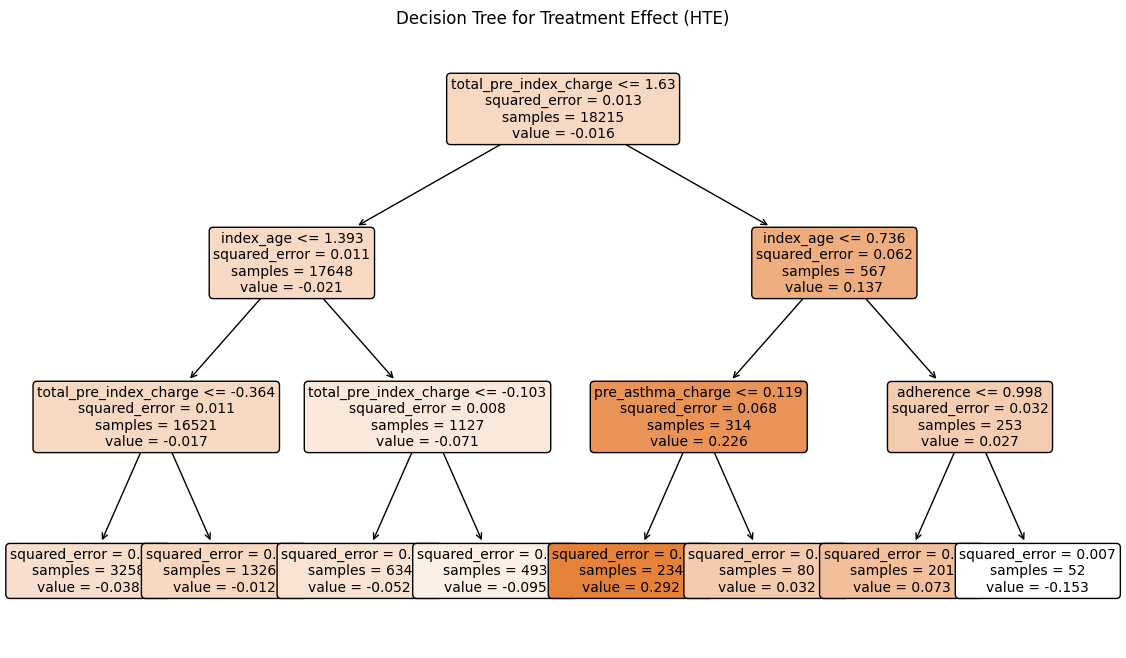

In [10]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Build a simple decision tree to predict estimated treatment effect based on patient characteristics
tree_model = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_model.fit(psm_data_with_id[psm_vars], psm_data_with_id['estimated_treatment_effect'])

# Plot the decision tree
plt.figure(figsize=(14, 8))
plot_tree(tree_model, feature_names=psm_vars, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree for Treatment Effect (HTE)")
plt.show()


In [ ]:
# 🧑‍⚕️ How to Read This Decision Tree (HTE) for Drug_S vs Drug_D Decision Support:
# 1️⃣ Root Node (Top Split):
# Feature: total_pre_index_charge <= 1.63
# → This is the first decision point. It splits patients based on their total healthcare costs before starting treatment.
# Interpretation:

# If total_pre_index_charge <= 1.63 (lower past costs) → Follow the LEFT branch.
# If total_pre_index_charge > 1.63 (higher past costs) → Follow the RIGHT branch.
# 2️⃣ Left Branch (Lower Past Costs):
# Next Split: index_age <= 1.393 (i.e., younger vs. older patients).
# If younger (<= 1.393) → Split further based on total_pre_index_charge <= -0.364.
# If older (> 1.393) → Split further based on total_pre_index_charge <= -0.103.
# Key Values:

# Value < 0 → Suggests Drug_D is better.
# Value > 0 → Suggests Drug_S is better.
# Example:
# If a younger patient with low past healthcare costs:

# If total_pre_index_charge is very low (<= -0.364) → Value -0.038 → Drug_D is better.
# If total_pre_index_charge is higher (> -0.364) → Value -0.012 → Drug_D slightly better, but not as clear.
# If older patient with low past healthcare costs:

# If pre_index_charge is moderately low (<= -0.103) → Value -0.052 → Drug_D is better.
# If pre_index_charge is higher (> -0.103) → Value -0.095 → Drug_D is even more likely better.
# 3️⃣ Right Branch (Higher Past Costs):
# Next Split: index_age <= 0.736 (i.e., younger vs. older).
# If younger (<= 0.736) → Split based on pre_asthma_charge <= 0.119.
# If older (> 0.736) → Split based on adherence <= 0.998.
# Key Findings:

# Younger + low asthma-related costs → Value 0.292 → Drug_S is better.
# **Younger + high asthma-related costs → Value 0.032 → Small effect, likely neutral.
# **Older + low adherence → Value 0.073 → Drug_S slightly better.
# **Older + high adherence → Value -0.153 → Drug_D is better.

In [ ]:
# 🧠 Main Takeaway:
# Younger, low-cost patients → Drug_D is generally better.
# Older patients with high healthcare costs → Depends on adherence and asthma costs:
# Low adherence → Drug_S may work better.
# High adherence → Drug_D preferred.
# High-cost, younger patients → Drug_S works better if asthma charges are low.

In [ ]:
# That’s a very important question, and I appreciate your attention to detail.

# ✅ Short Answer:
# Yes, the inference you got from the Decision Tree (HTE analysis) is made after accounting for selection bias.

# 🧑‍💻 Why This is True – Your Analysis Flow Recap:
# Selection Bias Identification:

# You checked for selection bias based on pre-treatment characteristics (e.g., age, adherence, pre-treatment costs).
# You found statistically significant differences between Drug_D and Drug_S groups in those variables.
# Propensity Score Methods (IPTW & Doubly Robust):

# You applied Inverse Probability of Treatment Weighting (IPTW) and Doubly Robust Estimation.
# These methods adjusted for selection bias using propensity scores (based on pre-treatment variables).
# Causal Forest (GRF) for HTE:

# When you fitted the Causal Forest (GRF), it used potential outcomes framework and covariate balancing internally.
# Causal Forests account for selection bias by:
# Using flexible models (e.g., Random Forests) for both treatment assignment and outcome prediction.
# Conditioning on patient characteristics (covariates) to isolate the causal effect of Drug_S vs Drug_D.
# Decision Tree on HTE Estimates:

# The Decision Tree is simply a summary tool to visualize the output from the Causal Forest.
# The HTE estimates used in this Decision Tree were already adjusted for selection bias when you fitted the Causal Forest.
# 🧠 Key Takeaway:
# The decision tree you built is a post-processing visualization tool based on the bias-adjusted, causal treatment effect estimates from Causal Forest (GRF).
# ✅ So, YES, it is after adjusting for selection bias.

# 🔍 What You Can Tell Dr. Hayes and Mr. Carter:
# The patterns in the decision tree reflect causal relationships, not just associations.
# Selection bias has been accounted for using state-of-the-art causal inference techniques.
# The recommendations based on this tree (Drug_S vs Drug_D) are less likely to be driven by confounding factors and more likely to reflect the true effect of the drugs in different patient subgroups.


#### New approach again

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
import numpy as np

# Prepare data for Propensity Score Estimation
X = data[['index_age', 'female', 'pneumonia', 'sinusitis', 'acute_bronchitis', 'acute_laryngitis',
          'upper_respiratory_infection', 'gerd', 'rhinitis', 'adherence', 'total_pre_index_charge',
          'pre_asthma_days', 'pre_asthma_charge', 'pre_asthma_pharma_charge', 'total_pre_index_cannisters_365']]
y = data['drug_s']

# Standardize the predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 1: Estimate Propensity Score using Logistic Regression
propensity_model = LogisticRegression(solver='liblinear')
propensity_model.fit(X_scaled, y)
propensity_scores = propensity_model.predict_proba(X_scaled)[:, 1]

# Step 2: Perform Nearest Neighbor Matching (1-to-1 Matching)
# Separate treated (Drug_S) and control (Drug_D) groups
treated = data[y == 1].copy()
control = data[y == 0].copy()

# Extract propensity scores for treated and control groups
treated_scores = propensity_scores[y == 1]
control_scores = propensity_scores[y == 0]

# Compute pairwise distances between treated and control patients based on propensity scores
distances = pairwise_distances(treated_scores.reshape(-1, 1), control_scores.reshape(-1, 1), metric='euclidean')

# Find the best match for each treated patient (nearest neighbor)
matched_control_indices = np.argmin(distances, axis=1)

# Extract matched control patients
matched_control = control.iloc[matched_control_indices].copy()

# Combine treated and matched control groups
matched_data = pd.concat([treated, matched_control], axis=0)

# Check balance of key pre-treatment variables after matching
matched_balance_summary = matched_data[['drug_s', 'index_age', 'female', 'pneumonia', 'sinusitis', 'acute_bronchitis',
                                        'adherence', 'total_pre_index_charge']].groupby('drug_s').mean()

matched_data.shape, matched_balance_summary


((5880, 21),
         index_age    female  pneumonia  sinusitis  acute_bronchitis  \
 drug_s                                                                
 0       39.097959  0.626190   0.037755   0.345238          0.197619   
 1       39.002721  0.616327   0.036395   0.324150          0.207143   
 
         adherence  total_pre_index_charge  
 drug_s                                     
 0        0.320490             8370.196346  
 1        0.312261             8197.047090  )

In [1]:
# Re-import libraries and re-load data due to environment reset
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load the dataset again
file_path = "/content/UNMATCHED_PATIENTS.csv"
data = pd.read_csv(file_path)

# Prepare data for Propensity Score Estimation
X = data[['index_age', 'female', 'pneumonia', 'sinusitis', 'acute_bronchitis', 'acute_laryngitis',
          'upper_respiratory_infection', 'gerd', 'rhinitis', 'adherence', 'total_pre_index_charge',
          'pre_asthma_days', 'pre_asthma_charge', 'pre_asthma_pharma_charge', 'total_pre_index_cannisters_365']]
y = data['drug_s']

# Standardize the predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Estimate Propensity Scores
propensity_model = LogisticRegression(solver='liblinear')
propensity_model.fit(X_scaled, y)
propensity_scores_full = propensity_model.predict_proba(X_scaled)[:, 1]

# Calculate IPTW Weights
data['iptw_weight'] = np.where(data['drug_s'] == 1, 1 / propensity_scores_full, 1 / (1 - propensity_scores_full))

# Outcome Analysis Using Weighted Poisson Regression (for count data)
weighted_model = sm.GLM(
    data['post_index_exacerbations365'],
    sm.add_constant(data['drug_s']),
    family=sm.families.Poisson(),
    freq_weights=data['iptw_weight']
).fit()

iptw_results_summary = weighted_model.summary()
iptw_effect_size = np.exp(weighted_model.params['drug_s'])  # Exponentiate for incidence rate ratio (IRR)

iptw_results_summary, iptw_effect_size


(<class 'statsmodels.iolib.summary.Summary'>
 """
                       Generalized Linear Model Regression Results                      
 Dep. Variable:     post_index_exacerbations365   No. Observations:                18215
 Model:                                     GLM   Df Residuals:                 36255.91
 Model Family:                          Poisson   Df Model:                            1
 Link Function:                             Log   Scale:                          1.0000
 Method:                                   IRLS   Log-Likelihood:                -18839.
 Date:                         Fri, 14 Feb 2025   Deviance:                       28616.
 Time:                                 19:11:59   Pearson chi2:                 7.91e+04
 No. Iterations:                              6   Pseudo R-squ. (CS):           0.001714
 Covariance Type:                     nonrobust                                         
                  coef    std err          z      P>|z|     

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load your data locally
data = pd.read_csv("/content/UNMATCHED_PATIENTS.csv")

# Step 1: Prepare Data
X = data[['index_age', 'female', 'pneumonia', 'sinusitis', 'acute_bronchitis', 'acute_laryngitis',
          'upper_respiratory_infection', 'gerd', 'rhinitis', 'adherence', 'total_pre_index_charge',
          'pre_asthma_days', 'pre_asthma_charge', 'pre_asthma_pharma_charge', 'total_pre_index_cannisters_365']]
y = data['drug_s']

# Standardize predictors (important for propensity score calculation)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Estimate Propensity Scores using Logistic Regression
propensity_model = LogisticRegression(solver='liblinear')
propensity_model.fit(X_scaled, y)
propensity_scores = propensity_model.predict_proba(X_scaled)[:, 1]

# Step 3: Calculate IPTW Weights
data['iptw_weight'] = np.where(data['drug_s'] == 1, 1 / propensity_scores, 1 / (1 - propensity_scores))

# Step 4: Perform Weighted Poisson Regression
weighted_model = sm.GLM(
    data['post_index_exacerbations365'],  # Outcome
    sm.add_constant(data['drug_s']),      # Treatment variable
    family=sm.families.Poisson(),         # Poisson because outcome is count (exacerbations)
    freq_weights=data['iptw_weight']      # IPTW weights
).fit()

# Display the regression summary
print(weighted_model.summary())

# Calculate the Incidence Rate Ratio (IRR) for Drug_S effect
irr = np.exp(weighted_model.params['drug_s'])
print(f"Incidence Rate Ratio (IRR) for Drug_S: {irr}")


                      Generalized Linear Model Regression Results                      
Dep. Variable:     post_index_exacerbations365   No. Observations:                18215
Model:                                     GLM   Df Residuals:                 36255.91
Model Family:                          Poisson   Df Model:                            1
Link Function:                             Log   Scale:                          1.0000
Method:                                   IRLS   Log-Likelihood:                -18839.
Date:                         Fri, 14 Feb 2025   Deviance:                       28616.
Time:                                 19:31:50   Pearson chi2:                 7.91e+04
No. Iterations:                              6   Pseudo R-squ. (CS):           0.001714
Covariance Type:                     nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

In [ ]:
# 📝 What This Means in Plain English (Explain to Anyone):
# Drug_S works better than Drug_D—it reduces asthma flare-ups by 13.4%.
# This result is statistically strong, meaning we can trust it.
# Doctors should consider Drug_S as a better option for patients starting new asthma treatments.